## Observations and Insights 

In [175]:
%matplotlib notebook

In [252]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import sem
import scipy.stats as st
import random

random.seed(42)

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [253]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [254]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [255]:
# Combine the data into a single dataset

# Display the data table for preview

merge1_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge1_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [256]:
merge2_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
merge2_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [257]:
merge3_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
merge3_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [258]:
merge4_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")
merge4_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [259]:
# Checking the number of mice.

In [260]:
mice_count = len(merge1_df["Mouse ID"].unique())
mice_count

249

In [261]:
merge1_df["Mouse ID"].unique()

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531',
      

In [262]:
merge1_df["Mouse ID"].value_counts()

g989    13
b128    10
r701    10
a685    10
l897    10
        ..
u153     1
t573     1
o848     1
n482     1
b447     1
Name: Mouse ID, Length: 249, dtype: int64

In [263]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

merge5_df = merge1_df[["Mouse ID", "Timepoint"]]
merge5_df

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [264]:
grouped_mice_df = merge1_df.groupby(["Mouse ID", "Timepoint"])
print (grouped_mice_df)

In [265]:
grouped_mice_df.count()

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
a203     0                     1    1           1           1   
         5                     1    1           1           1   
         10                    1    1           1           1   
         15                    1    1           1           1   
         20                    1    1           1           1   
...                          ...  ...         ...         ...   
z969     25                    1    1           1           1   
         30                    1    1           1           1   
         35                    1    1           1           1   
         40                    1    1           1           1   
         45                    1    1           1           1   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
a203     0                           1                 1  
         5                           1                 1  
         10                          1                 1  
         15                          1                 1  
         20                          1                 1  
...                                ...               ...  
z969     25                          1                 1  
         30                          1                 1  
         35                          1                 1  
         40                          1                 1  
         45                          1                 1  

[1888 rows x 6 columns]

In [266]:
merge5_df["Mouse ID"].value_counts()

g989    13
b128    10
r701    10
a685    10
l897    10
        ..
u153     1
t573     1
o848     1
n482     1
b447     1
Name: Mouse ID, Length: 249, dtype: int64

In [267]:
# Optional: Get all the data for the duplicate mouse ID. 
merge5_df

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [268]:
merge5_df.count()

# It's showing the same number. Does this mean there is no duplicate?

Mouse ID     1893
Timepoint    1893
dtype: int64

In [269]:
no_null_dupe_df = merge5_df.dropna(how='any')

In [270]:
no_null_dupe_df.count()

Mouse ID     1893
Timepoint    1893
dtype: int64

In [271]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge6_df = no_null_dupe_df.loc[no_null_dupe_df["Mouse ID"] == "NaN"]
merge6_df

,Mouse ID,Timepoint


In [272]:
# Checking the number of mice in the clean DataFrame.
no_null_dupe_df.count()

Mouse ID     1893
Timepoint    1893
dtype: int64

## Summary Statistics

In [273]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the 
# tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [274]:
merge1_df.columns.tolist()

['Mouse ID',
 'Drug Regimen',
 'Sex',
 'Age_months',
 'Weight (g)',
 'Timepoint',
 'Tumor Volume (mm3)',
 'Metastatic Sites']

In [275]:
merge1_df["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [276]:
only_capomulin = merge1_df.loc[merge1_df["Drug Regimen"] == "Capomulin", :]
print(only_capomulin)

print()

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10       s185    Capomulin  Female           3          17          0   
11       s185    Capomulin  Female           3          17          5   
12       s185    Capomulin  Female           3          17         10   
13       s185    Capomulin  Female           3          17         15   
14       s185    Capomulin  Female           3          17         20   
...       ...          ...     ...         ...         ...        ...   
440      i557    Capomulin  Female           1          24         45   
1452     r157    Capomulin    Male          22          25          0   
1453     r157    Capomulin    Male          22          25          5   
1454     r157    Capomulin    Male          22          25         10   
1455     r157    Capomulin    Male          22          25         15   

      Tumor Volume (mm3)  Metastatic Sites  
10             45.000000                 0  
11             43.878496         

In [277]:
# Test and compare values for Capomulin as a sample

In [278]:
tumorVolCapomulin = only_capomulin['Tumor Volume (mm3)']

In [279]:
# Show summary statistics calculation for each Drug Regimen
mean_numpyCapomulin = np.mean(tumorVolCapomulin)
print(f"The mean for the Tumor Volume (mm3) of the Drug Regimen Capomulin is {mean_numpyCapomulin}")

median_numpyCapomulin = np.median(tumorVolCapomulin)
print(f"The median for the Tumor Volume (mm3) of the Drug Regimen Capomulin is {median_numpyCapomulin}")

mode_scipyCapomulin = sts.mode(tumorVolCapomulin)
print(f"The mode for the Tumor Volume (mm3) of the Drug Regimen Capomulin is {mode_scipyCapomulin}")

var_numpyCapomulin = np.var(tumorVolCapomulin,ddof = 0)
print(f"The variance for the Drug Regimen Capomulin using the NumPy module  is {var_numpyCapomulin}")

sd_numpyCapomulin = np.std(tumorVolCapomulin,ddof = 0)
print(f"The standard deviation for the Drug Regimen Capomulin using the NumPy module is {sd_numpyCapomulin}")

# sample = study_results.sample(10)
# print(f"The SEM value for the sample data is {sem(sample.tumorVolCapomulin)}")
# WWhy won't this work?

The mean for the Tumor Volume (mm3) of the Drug Regimen Capomulin is 40.67574114100001
The median for the Tumor Volume (mm3) of the Drug Regimen Capomulin is 41.557808879999996
The mode for the Tumor Volume (mm3) of the Drug Regimen Capomulin is ModeResult(mode=array([45.]), count=array([25]))
The variance for the Drug Regimen Capomulin using the NumPy module  is 24.839295580601572
The standard deviation for the Drug Regimen Capomulin using the NumPy module is 4.9839036488079875


In [280]:
# grouped_regimen2_df = merge1_df.groupby(["Drug Regimen", "Tumor Volume (mm3)"])
# print (grouped_regimen2_df)

In [281]:
#rename Tumor Vol column for agg formula

renamed_Vol = merge1_df.rename(columns={"Tumor Volume (mm3)" : "TumorVolume"})
renamed_Vol

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,TumorVolume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [282]:
regimen_df = renamed_Vol[["Drug Regimen", "TumorVolume"]]
regimen_df

,Drug Regimen,TumorVolume
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729
...,...,...
1888,Naftisol,63.145652
1889,Naftisol,65.841013
1890,Naftisol,69.176246
1891,Naftisol,70.314904


In [283]:
grouped_regimen2_df = regimen_df.groupby(["Drug Regimen"])
print (grouped_regimen2_df)

grouped_regimen2_df.mean()

,TumorVolume
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.322552
Ramicane,40.216745
Stelasyn,54.233149


In [284]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the 
# tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


In [285]:
grouped_regimen3_df = regimen_df.groupby("Drug Regimen").TumorVolume.agg(['mean', 'median', 'var'])

grouped_regimen3_df

# SD inserted but shows error

,mean,median,var
Drug Regimen,,,
Capomulin,40.675741,41.557809,24.947764
Ceftamin,52.591172,51.776157,39.290177
Infubinol,52.884795,51.820584,43.128684
Ketapril,55.235638,53.698743,68.553577
Naftisol,54.331565,52.509285,66.173479
Placebo,54.033581,52.288934,61.168083
Propriva,52.322552,50.854632,42.351070
Ramicane,40.216745,40.673236,23.486704
Stelasyn,54.233149,52.431737,59.450562


## Bar and Pie Charts

In [286]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

In [287]:
regimen3_df = merge1_df[["Drug Regimen", "Mouse ID"]]
regimen3_df

,Drug Regimen,Mouse ID
0,Ramicane,k403
1,Ramicane,k403
2,Ramicane,k403
3,Ramicane,k403
4,Ramicane,k403
...,...,...
1888,Naftisol,z969
1889,Naftisol,z969
1890,Naftisol,z969
1891,Naftisol,z969


In [288]:
grouped_regimen3_df = regimen3_df.groupby(["Drug Regimen"])
print (grouped_regimen3_df)

MouseID_count = grouped_regimen3_df.count()
MouseID_count

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


In [289]:
# Generate a bar plot showing the total number of 
# unique mice tested on each drug regimen using pyplot.

<IPython.core.display.Javascript object>


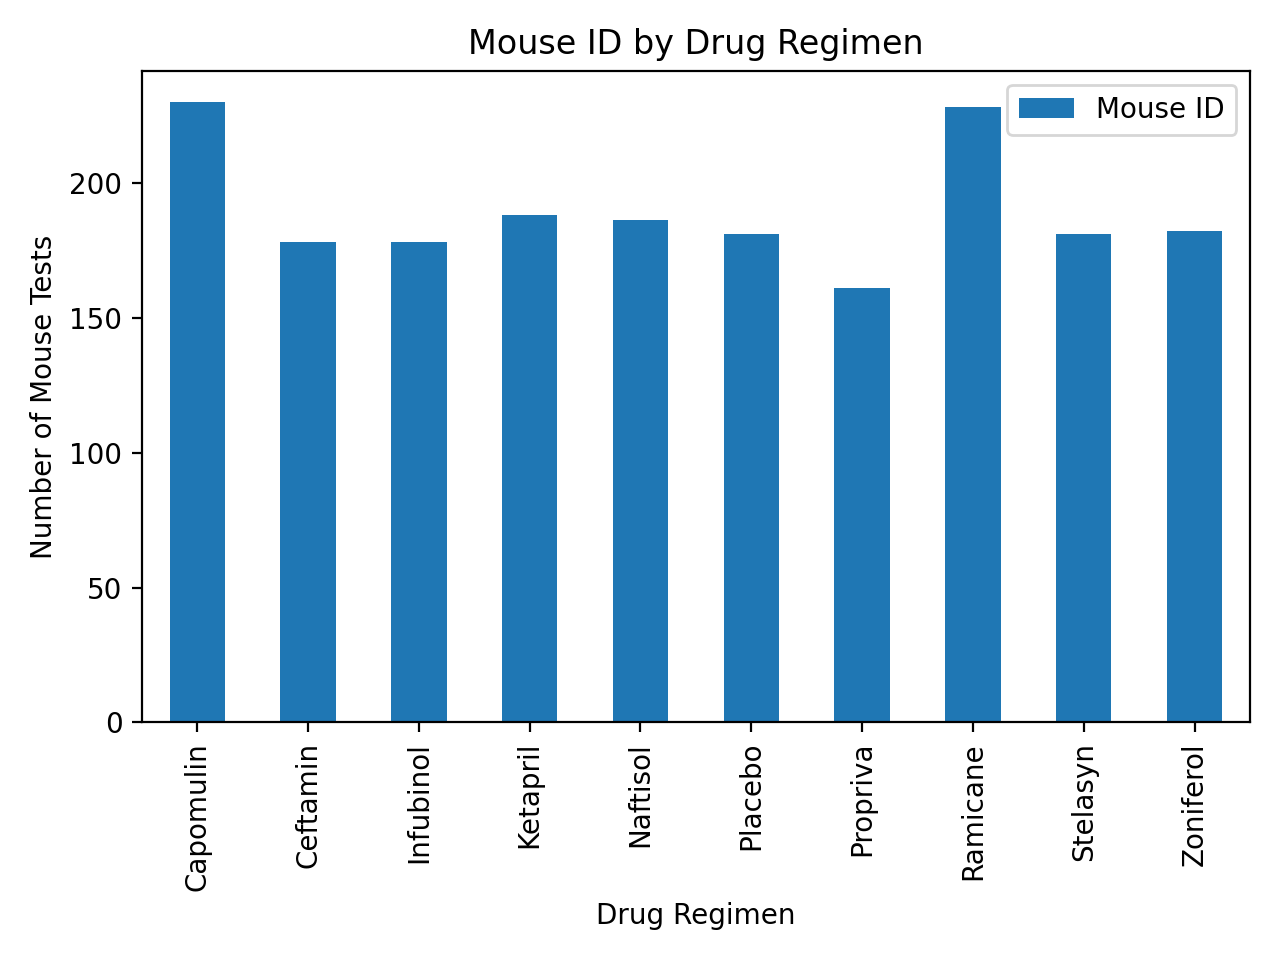

In [290]:
regimen1_chart = MouseID_count.plot(kind="bar", title="Mouse ID by Drug Regimen")
regimen1_chart.set_xlabel("Drug Regimen")
regimen1_chart.set_ylabel("Number of Mouse Tests")

plt.show()
plt.tight_layout()

In [291]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# BY DRUG REGIMEN or as a whole?

In [292]:
regimen4_df = merge1_df[["Drug Regimen", "Mouse ID", "Sex"]]
regimen4_df

,Drug Regimen,Mouse ID,Sex
0,Ramicane,k403,Male
1,Ramicane,k403,Male
2,Ramicane,k403,Male
3,Ramicane,k403,Male
4,Ramicane,k403,Male
...,...,...,...
1888,Naftisol,z969,Male
1889,Naftisol,z969,Male
1890,Naftisol,z969,Male
1891,Naftisol,z969,Male


In [293]:
grouped_regimen4_df = regimen4_df.groupby(["Drug Regimen", "Sex"])
print (grouped_regimen4_df)

MouseIDsex_count = grouped_regimen4_df.count()
MouseIDsex_count

Mouse ID
Drug Regimen Sex             
Capomulin    Female       128
             Male         102
Ceftamin     Female        92
             Male          86
Infubinol    Female        95
             Male          83
Ketapril     Female        58
             Male         130
Naftisol     Female        86
             Male         100
Placebo      Female       102
             Male          79
Propriva     Female        74
             Male          87
Ramicane     Female        74
             Male         154
Stelasyn     Female       107
             Male          74
Zoniferol    Female       119
             Male          63

In [294]:
regimen5_df = merge1_df[["Mouse ID", "Sex"]]
regimen5_df

,Mouse ID,Sex
0,k403,Male
1,k403,Male
2,k403,Male
3,k403,Male
4,k403,Male
...,...,...
1888,z969,Male
1889,z969,Male
1890,z969,Male
1891,z969,Male


In [295]:
grouped_regimen5_df = regimen5_df.groupby(["Sex"])
print (grouped_regimen5_df)

MouseIDsex2_count = grouped_regimen5_df.count()
MouseIDsex2_count

,Mouse ID
Sex,
Female,935
Male,958


In [296]:
# get percentage values

In [297]:
total = merge1_df["Mouse ID"].count()
total

1893

In [298]:
percentMice = (MouseIDsex2_count/total) * 100
MouseIDsex2_count["Percentage"] = percentMice
MouseIDsex2_count

,Mouse ID,Percentage
Sex,,
Female,935,49.392499
Male,958,50.607501


In [299]:
regimen6_df = MouseIDsex2_count[["Percentage"]]
regimen6_df

,Percentage
Sex,
Female,49.392499
Male,50.607501


In [300]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

<IPython.core.display.Javascript object>


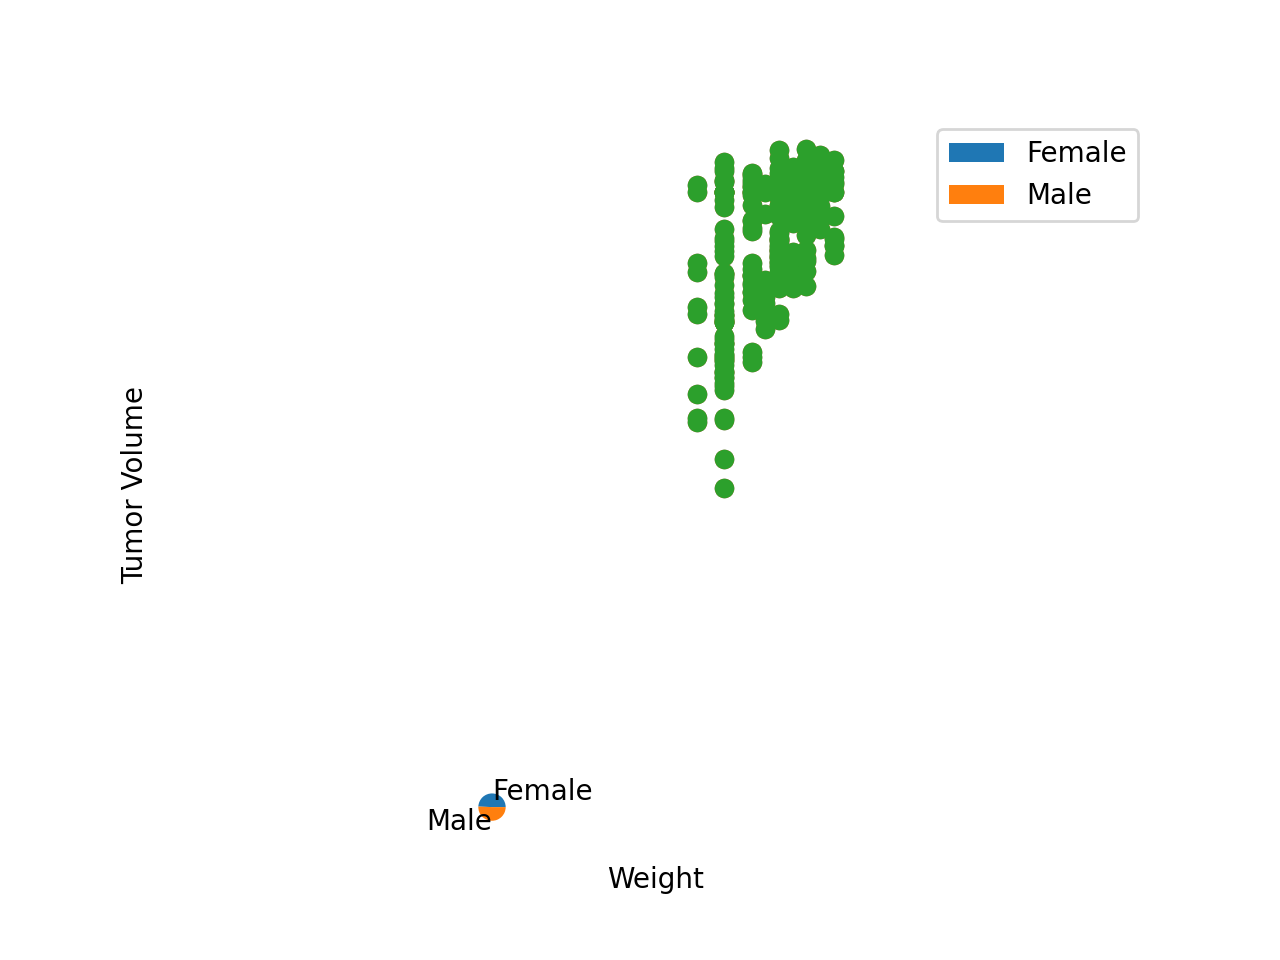

(-1.1045613723658971,
 1.1002172082078998,
 -1.1027130801595115,
 1.105172849624489)

In [301]:
bike_pie = regimen6_df.plot(kind="pie", y='Percentage')
bike_pie.set_ylabel("Sex")

plt.show()
plt.axis("equal")

In [302]:
# why aren't the percentage numbers showing?

## Quartiles, Outliers and Boxplots

In [303]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

## This instruction is confusing:
# Merge this group df with the original dataframe to get the 
# tumor volume at the last timepoint


In [304]:
regimen7_df = merge1_df[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
regimen7_df

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,0,45.000000
1,k403,Ramicane,5,38.825898
2,k403,Ramicane,10,35.014271
3,k403,Ramicane,15,34.223992
4,k403,Ramicane,20,32.997729
...,...,...,...,...
1888,z969,Naftisol,25,63.145652
1889,z969,Naftisol,30,65.841013
1890,z969,Naftisol,35,69.176246
1891,z969,Naftisol,40,70.314904


In [305]:
# Create a new DataFrame with the 4 specified regimens
regimen7specified_df = regimen7_df.loc[(regimen7_df["Drug Regimen"] == "Capomulin") | (regimen7_df["Drug Regimen"] == "Ramicane") | (regimen7_df["Drug Regimen"] == "Infubinol") | (regimen7_df["Drug Regimen"] == "Ceftamin")]
regimen7specified_df

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,0,45.000000
1,k403,Ramicane,5,38.825898
2,k403,Ramicane,10,35.014271
3,k403,Ramicane,15,34.223992
4,k403,Ramicane,20,32.997729
...,...,...,...,...
1868,z581,Infubinol,25,54.316407
1869,z581,Infubinol,30,56.286750
1870,z581,Infubinol,35,58.628399
1871,z581,Infubinol,40,60.053740


In [306]:
# Sort from highest to lowest, based on timepoint, use ascending=False
regimen7sorted_df = regimen7specified_df.sort_values("Timepoint", ascending=False)
regimen7sorted_df

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
1872,z581,Infubinol,45,62.754451
800,e476,Infubinol,45,62.435404
154,c758,Ramicane,45,33.397653
440,i557,Capomulin,45,47.685963
144,m957,Capomulin,45,33.329098
...,...,...,...,...
75,z578,Ramicane,0,45.000000
1113,l490,Ceftamin,0,45.000000
1120,l558,Ceftamin,0,45.000000
1123,l661,Ceftamin,0,45.000000


In [307]:
grouped_regimen7specified_df = regimen7specified_df.groupby(["Drug Regimen"])
print (grouped_regimen7specified_df)

groupedMax_regimen7specified_df = grouped_regimen7specified_df.max()
groupedMax_regimen7specified_df

,Mouse ID,Timepoint,Tumor Volume (mm3)
Drug Regimen,,,
Capomulin,y793,45,48.158209
Ceftamin,y865,45,68.923185
Infubinol,z581,45,72.226731
Ramicane,z578,45,47.622816


In [308]:
# change Timepoint to MAX Timepoint

renamed_Timepoint = groupedMax_regimen7specified_df.rename(columns={"Timepoint" : "MAX Timepoint"})
renamed_Timepoint

,Mouse ID,MAX Timepoint,Tumor Volume (mm3)
Drug Regimen,,,
Capomulin,y793,45,48.158209
Ceftamin,y865,45,68.923185
Infubinol,z581,45,72.226731
Ramicane,z578,45,47.622816


In [309]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [310]:
regimen8 = groupedMax_regimen7specified_df['Tumor Volume (mm3)']

quartiles = regimen8.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume data is: {lowerq}")
print(f"The upper quartile of Tumor Volume data is: {upperq}")
print(f"The interquartile range of Tumor Volume data is: {iqr}")
print(f"The median of Tumor Volume data is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume data is: 48.024361132500005
The upper quartile of Tumor Volume data is: 69.74907115250001
The interquartile range of Tumor Volume data is: 21.724710020000003
The median of Tumor Volume data is: 58.54069698000001 
Values below 15.4372961025 could be outliers.
Values above 102.33613618250001 could be outliers.


In [311]:
# Generate a box plot of the final tumor volume of each mouse across four 
# regimens of interest

# multiple box plots from stack overflow

In [312]:
# load data into data frame
# df = pd.read_csv(data, sep=' ')
# regimen7specified_df

# group data by Country
# grouped_data = df.groupby(['Country'])
# groupedMax_regimen7specified_df

# create list of grouped data frames
regimen7specified_df_list = []
groupedMax_regimen7specified_df_list = []
for item in list(groupedMax_regimen7specified_df_list):
    regimen7specified_df_list.append(item[1])
    groupedMax_regimen7specified_df_list.append(item[0])

# plot box for each Drug Regimen
for regimen7specified_df in regimen7specified_df_list:
    groupedMax_regimen7specified_df = regimen7specified_df['Drug Regimen'].unique()
    regimen7specified_df = regimen7specified_df.drop(['Drug Regimen'], axis=1)
    regimen7specified_df = regimen7specified_df[['Timepoint', 'Tumor Volume (mm3)']]
    columns_names = list(set(regimen7specified_df['Timepoint']))
    # pivot rows into columns
    regimen7specified_df = regimen7specified_df.assign(g = regimen7specified_df.groupby('Timepoint').cumcount()).pivot('Timepoint','Tumor Volume (mm3)')
    # plot box
    regimen7specified_df.boxplot(column=colums_names)
    plt.title(groupedMax_regimen7specified_df[0])
    plt.show()

## Line and Scatter Plots

In [313]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [314]:
# Create a new DataFrame with the specific mouse
# regimen9specified_df = regimen7_df.loc[(regimen7_df["Drug Regimen"] == "Capomulin")]
# regimen9specified_df

In [315]:
regimen9specified_df = regimen7_df.loc[(regimen7_df["Mouse ID"] == "i557")]
regimen9specified_df

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
431,i557,Capomulin,0,45.000000
432,i557,Capomulin,5,42.261665
433,i557,Capomulin,10,42.992077
434,i557,Capomulin,15,43.529876
435,i557,Capomulin,20,43.967895
436,i557,Capomulin,25,44.596219
437,i557,Capomulin,30,45.261384
438,i557,Capomulin,35,45.941949
439,i557,Capomulin,40,46.821070
440,i557,Capomulin,45,47.685963


In [316]:
# Set index
TumorVol = regimen9specified_df.set_index("Timepoint")

In [317]:
tp = TumorVol.keys()

<IPython.core.display.Javascript object>


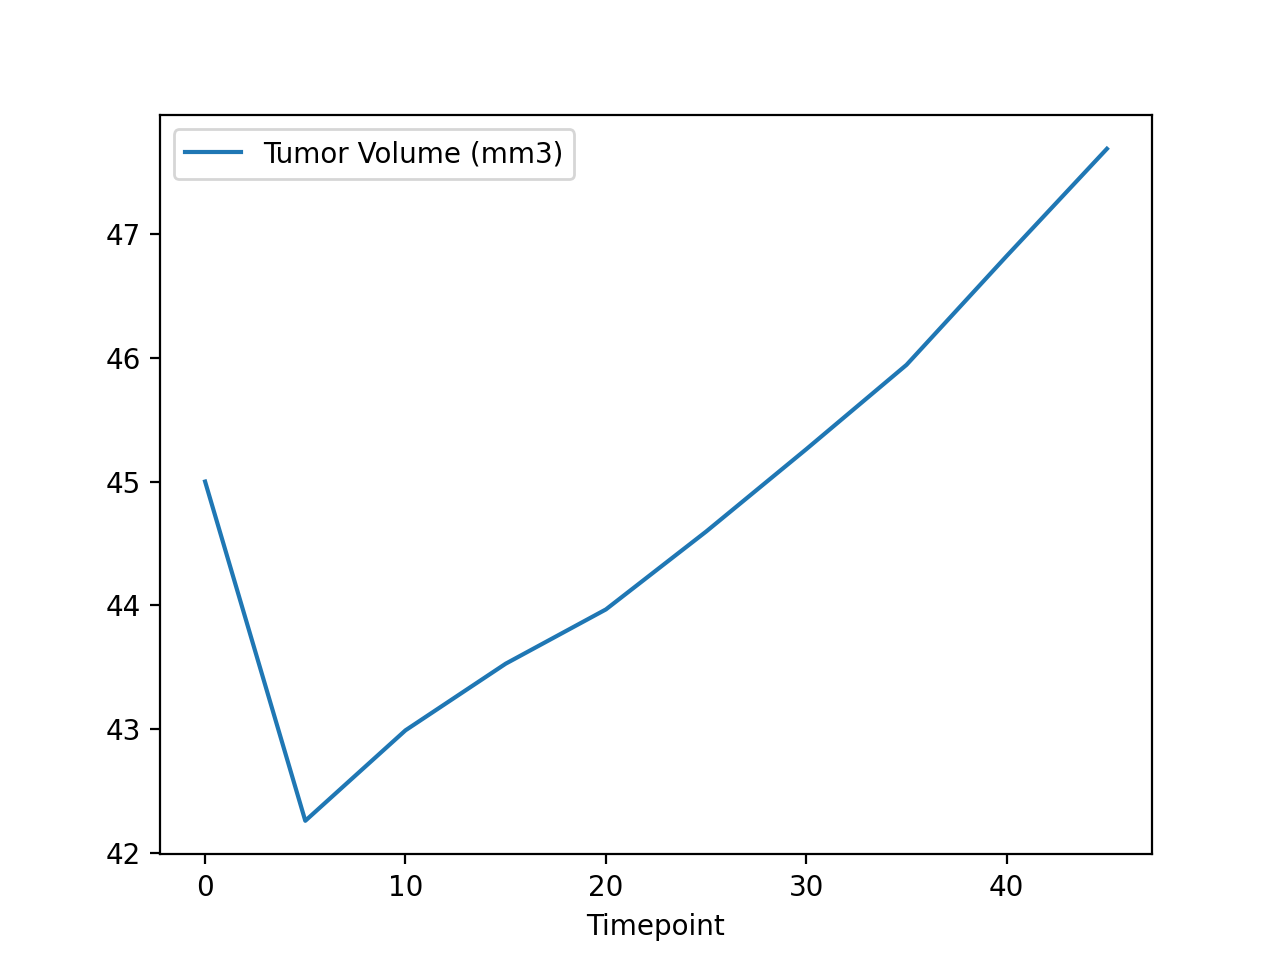

In [318]:
TumorVol.plot(label = "Tumor Vol")

plt.legend()
plt.show()

In [321]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

merge1_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [322]:
regimen10_df = merge1_df[["Mouse ID", "Drug Regimen", "Weight (g)", "Tumor Volume (mm3)"]]
regimen10_df

,Mouse ID,Drug Regimen,Weight (g),Tumor Volume (mm3)
0,k403,Ramicane,16,45.000000
1,k403,Ramicane,16,38.825898
2,k403,Ramicane,16,35.014271
3,k403,Ramicane,16,34.223992
4,k403,Ramicane,16,32.997729
...,...,...,...,...
1888,z969,Naftisol,30,63.145652
1889,z969,Naftisol,30,65.841013
1890,z969,Naftisol,30,69.176246
1891,z969,Naftisol,30,70.314904


In [323]:
regimen10cap_df = regimen10_df.loc[(regimen10_df["Drug Regimen"] == "Capomulin")]
regimen10cap_df

,Mouse ID,Drug Regimen,Weight (g),Tumor Volume (mm3)
10,s185,Capomulin,17,45.000000
11,s185,Capomulin,17,43.878496
12,s185,Capomulin,17,37.614948
13,s185,Capomulin,17,38.177232
14,s185,Capomulin,17,36.866876
...,...,...,...,...
440,i557,Capomulin,24,47.685963
1452,r157,Capomulin,25,45.000000
1453,r157,Capomulin,25,45.597064
1454,r157,Capomulin,25,46.059608


In [326]:
plt.scatter(regimen10cap_df['Weight (g)'], regimen10cap_df['Tumor Volume (mm3)'])

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [327]:
# No errors are showing but scatter points are showing up over the line graph above

In [328]:
# Set index
# TumVol = regimen10cap_df.set_index("Tumor Volume (mm3)")


In [329]:

# Collect the mean 
# ave_tumor = TumVol.mean()



In [330]:
# Collect the years where data was collected
# weightG = ave_tumor.keys()

# TumorVol.plot(label = "Tumor Vol")

# plt.legend()
# plt.show()

In [331]:
# plt.scatter(weightG, ave_tumor)

# plt.xlabel("Weight (g)")
# plt.ylabel("Tumor Volume (mm3)")

# plt.show()

## Correlation and Regression

In [332]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [333]:
plt.scatter(regimen10cap_df.iloc[:,2],regimen10cap_df.iloc[:,3])
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.show()

In [334]:
# Calculate the Pearson correlation coefficient between "Weight" and "Tumor Volume"
weight = regimen10cap_df.iloc[:,2]
tumor = regimen10cap_df.iloc[:,3]
correlation = st.pearsonr(weight,tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.53
